In [1]:
# input the years for which you want to access the data
years = [1994, 1995, 1996] 

In [2]:
# url for the chicago bulls team 
url_start = "https://www.basketball-reference.com/teams/CHI/{}.html"

In [3]:
# # gets you the data and stores it in the Storage file 
# import requests

# for year in years: 
#     url = url_start.format(year)
#     data = requests.get(url)
#     f = open("Storage/{}.html".format(year), "w+", encoding="utf-8")
#     f.write(data.text)
# # Uncomment only when years changes

In [4]:
# select dataframe based on the title 
# Adding a year column so we know which year it is 
pergame_table = []
import pandas as pd 
from bs4 import BeautifulSoup

for i in years:
    with open("Storage/1996.html", encoding = "utf-8") as f: 
        page = f.read()
        soup = BeautifulSoup(page, "html.parser") # creates a parser class that will help us extract the html code from the page
        pergame = soup.find(id="per_game")
        pd.read_html(str(pergame))[0]
        df = pd.read_html(str(pergame))[0]
        df.insert(0, "Year", i)
        pergame_table.append(df)

In [5]:
# Code to find the year that is required 
reqYear = 1994

for i in pergame_table: 
    yr = i["Year"][0]
    if yr == reqYear: 
        print("Found")

Found


In [6]:

def FindStats(df): 
    names = df["Unnamed: 1"]
    FG = df["FG"]
    Assist = df["AST"]
    pointsPerGame = df["PTS/G"]
    year = df["Year"]
    dict = {"Year": year, "Names": names, "Field Goals": FG, "Assists": Assist, "pointsPerGame":pointsPerGame}
    
    return pd.DataFrame(dict)

In [8]:
pg = FindStats(pergame_table[0])
fg = pg["Field Goals"]
names = pg["Names"]
assist = pg["Assists"]
ppg = pg["pointsPerGame"]

C:\Users\birat\AppData\Local\Temp\ipykernel_9492\261191277.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(names, rotation = 90)


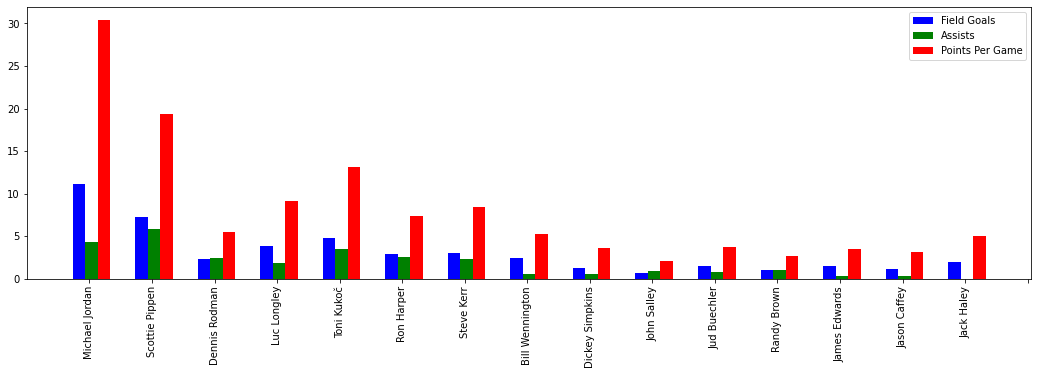

In [9]:
# Lets me plot the graph in a way that I can represt the data for the people quite easily

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(len(fg)) 
x = x -1

f, ax = plt.subplots(figsize=(18,5))

ax.bar(x-0.2, fg, width=0.2, color='b', align='center', label = "Field Goals")
ax.bar(x, assist, width=0.2, color='g', align='center', label = "Assists")
ax.bar(x+0.2, ppg, width=0.2, color='r', align='center', label = "Points Per Game")
ax.set_xticklabels(names, rotation = 90)
start, end = ax.get_xlim()
stepsiassiste = 1
ax.xaxis.set_ticks(np.arange(start + 1, end, stepsiassiste))

ax.legend()

In [10]:
# Lets plot the data where it's easy 
name = "Micheal Jordan"
PG = []
years = []
for i in pergame_table:
    pg = pergame_table[i]
    names = pg["Name"]
    
    

TypeError: 'list' object cannot be interpreted as an integer